<a href="https://www.kaggle.com/code/deepakbaiju/spotify-top-50-streaming-songs-2023?scriptVersionId=132216211" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("/kaggle/input/spotify-streaming-dataset/spotify-streaming-top-50-world.csv")
data

,date,position,song,artist,popularity,duration_ms,album_type,total_tracks,release_date,is_explicit,album_cover_url
0,2023-05-18,1,Ella Baila Sola,Eslabon Armado,89,165671,album,16,2023-04-28,False,https://i.scdn.co/image/ab67616d0000b273dfddf1...
1,2023-05-18,2,un x100to,Grupo Frontera & Bad Bunny,99,194563,single,1,2023-04-17,False,https://i.scdn.co/image/ab67616d0000b273716c0b...
2,2023-05-18,3,La Bebe - Remix,Yng Lvcas & Peso Pluma,99,234352,single,2,2023-03-17,True,https://i.scdn.co/image/ab67616d0000b273a04be3...
3,2023-05-18,4,Cupid - Twin Ver.,FIFTY FIFTY,97,174253,single,3,2023-02-24,False,https://i.scdn.co/image/ab67616d0000b27337c0b3...
4,2023-05-18,5,Flowers,Miley Cyrus,91,200600,album,13,2023-03-10,False,https://i.scdn.co/image/ab67616d0000b27358039b...
...,...,...,...,...,...,...,...,...,...,...,...
395,2023-05-25,46,Unholy (feat. Kim Petras),Sam Smith,86,156943,album,13,2023-01-27,False,https://i.scdn.co/image/ab67616d0000b273fc3ff5...
396,2023-05-25,47,"Shakira: Bzrp Music Sessions, Vol. 53",Bizarrap & Shakira,94,214945,single,1,2023-01-11,False,https://i.scdn.co/image/ab67616d0000b2732b6d78...
397,2023-05-25,48,Frágil,Yahritza Y Su Esencia & Grupo Frontera,90,160517,single,1,2023-04-07,False,https://i.scdn.co/image/ab67616d0000b27357ed58...
398,2023-05-25,49,Yellow,Coldplay,91,266773,album,10,2000-07-10,False,https://i.scdn.co/image/ab67616d0000b2733d92b2...


In [3]:
data.columns

Index(['date', 'position', 'song', 'artist', 'popularity', 'duration_ms',
       'album_type', 'total_tracks', 'release_date', 'is_explicit',
       'album_cover_url'],
      dtype='object')

In [4]:
df=data.drop(['date','position','song','album_type','release_date','is_explicit','album_cover_url'],axis=1)
df

,artist,popularity,duration_ms,total_tracks
0,Eslabon Armado,89,165671,16
1,Grupo Frontera & Bad Bunny,99,194563,1
2,Yng Lvcas & Peso Pluma,99,234352,2
3,FIFTY FIFTY,97,174253,3
4,Miley Cyrus,91,200600,13
...,...,...,...,...
395,Sam Smith,86,156943,13
396,Bizarrap & Shakira,94,214945,1
397,Yahritza Y Su Esencia & Grupo Frontera,90,160517,1
398,Coldplay,91,266773,10


In [5]:
df.artist.value_counts()

The Weeknd                                         24
Taylor Swift                                       16
Miley Cyrus                                        16
Grupo Frontera & Bad Bunny                          8
Arctic Monkeys                                      8
Lil Durk & J. Cole                                  8
Morgan Wallen                                       8
David Guetta & Bebe Rexha                           8
Natanael Cano & Peso Pluma & Gabito Ballesteros     8
d4vd                                                8
Eslabon Armado                                      8
PinkPantheress & Ice Spice                          8
Kali Uchis                                          8
Bizarrap & Shakira                                  8
Tom Odell                                           8
Peso Pluma                                          8
Libianca                                            8
OneRepublic                                         8
Manuel Turizo               

In [6]:
df.artist.unique()

array(['Eslabon Armado', 'Grupo Frontera & Bad Bunny',
       'Yng Lvcas & Peso Pluma', 'FIFTY FIFTY', 'Miley Cyrus',
       'David Kushner', 'SZA', 'Loreen', 'Harry Styles', 'KAROL G',
       'Käärijä', 'Feid & Young Miko', 'Shakira', 'Metro Boomin',
       'Tyler, The Creator', 'ROSALÍA & Rauw Alejandro', 'The Weeknd',
       'Peso Pluma & Natanael Cano', 'Rema', 'Yandel',
       'Junior H & Peso Pluma', 'PinkPantheress & Ice Spice',
       'Taylor Swift', 'Arctic Monkeys', 'Lil Durk & J. Cole',
       'Morgan Wallen', 'David Guetta & Bebe Rexha',
       'Natanael Cano & Peso Pluma & Gabito Ballesteros', 'd4vd', 'JVKE',
       'Stephen Sanchez & Em Beihold', 'Jimin', 'Kali Uchis',
       'Bizarrap & Shakira', 'Sam Smith', 'Tom Odell', 'Peso Pluma',
       'Alessandra', 'Ozuna', 'Libianca', 'OneRepublic', 'Manuel Turizo',
       'Eminem', 'Yahritza Y Su Esencia & Grupo Frontera', 'JISOO',
       'Chino Pacas', 'Coldplay', 'Fast & Furious: The Fast Saga',
       'Lil Mabu', 'Bad Bunny'

# EDA

In [7]:
df.head(10)

,artist,popularity,duration_ms,total_tracks
0,Eslabon Armado,89,165671,16
1,Grupo Frontera & Bad Bunny,99,194563,1
2,Yng Lvcas & Peso Pluma,99,234352,2
3,FIFTY FIFTY,97,174253,3
4,Miley Cyrus,91,200600,13
5,David Kushner,96,212953,1
6,SZA,94,153946,23
7,Loreen,89,183374,1
8,Harry Styles,92,167303,13
9,KAROL G,96,197933,17


In [8]:
df.shape

(400, 4)

In [9]:
df.size

1600

In [10]:
df.info

<bound method DataFrame.info of                                      artist  popularity  duration_ms  \
0                            Eslabon Armado          89       165671   
1                Grupo Frontera & Bad Bunny          99       194563   
2                    Yng Lvcas & Peso Pluma          99       234352   
3                               FIFTY FIFTY          97       174253   
4                               Miley Cyrus          91       200600   
..                                      ...         ...          ...   
395                               Sam Smith          86       156943   
396                      Bizarrap & Shakira          94       214945   
397  Yahritza Y Su Esencia & Grupo Frontera          90       160517   
398                                Coldplay          91       266773   
399                              Peso Pluma          93       239845   

     total_tracks  
0              16  
1               1  
2               2  
3               3  
4  

In [11]:
df.isnull().sum()

artist          0
popularity      0
duration_ms     0
total_tracks    0
dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder
a=LabelEncoder()
df['artist']=a.fit_transform(df['artist'])

In [13]:
from sklearn.preprocessing import MinMaxScaler
a=MinMaxScaler(feature_range=(1,3))
b=['popularity','duration_ms','total_tracks']
for i in b:
    df[[i]]=a.fit_transform(df[[i]])

# Visualisations

Text(0, 0.5, '[popularity')

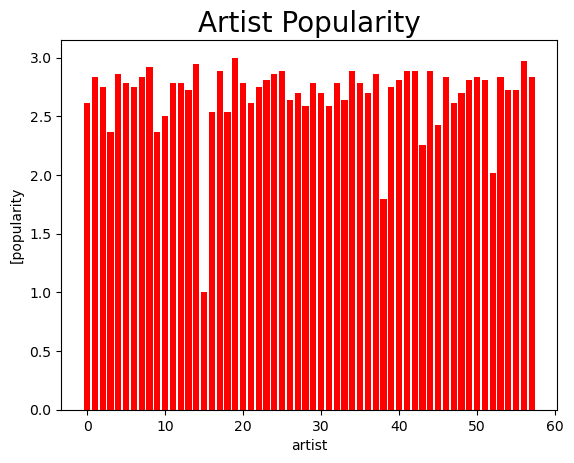

In [14]:
plt.bar(df['artist'],df['popularity'],data=df,color='r')
plt.title('Artist Popularity',fontsize=20)
plt.xlabel('artist')
plt.ylabel('[popularity')

Text(0.5, 1.0, 'Popular tracks')

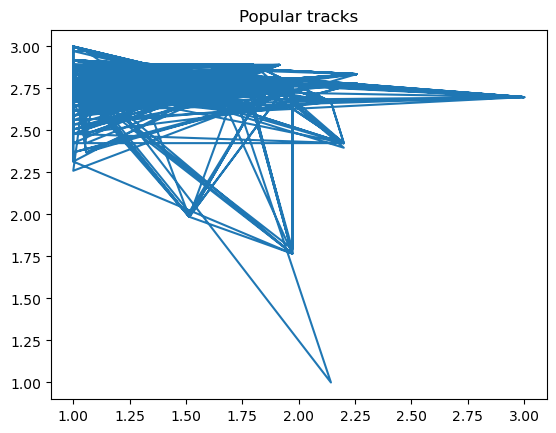

In [15]:
plt.plot(df['total_tracks'],df['popularity'])
plt.title('Popular tracks')


Text(0.5, 1.0, 'Artist Popularity')

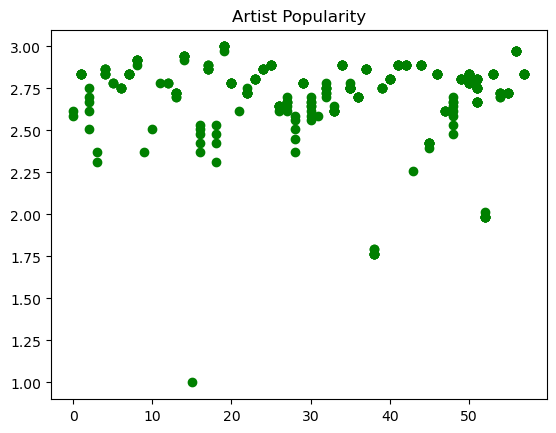

In [16]:
plt.scatter(df['artist'],df['popularity'],color='g')
plt.title('Artist Popularity')


# Splitting x and y

In [17]:
x=df.drop('artist',axis=1)
x

,popularity,duration_ms,total_tracks
0,2.698630,1.867008,1.857143
1,2.972603,2.190784,1.000000
2,2.972603,2.636676,1.057143
3,2.917808,1.963181,1.114286
4,2.753425,2.258437,1.685714
...,...,...,...
395,2.616438,1.769198,1.685714
396,2.835616,2.419193,1.000000
397,2.726027,1.809250,1.000000
398,2.753425,3.000000,1.514286


In [18]:
y=df['artist']
y

0      13
1      19
2      56
3      14
4      35
       ..
395    47
396     4
397    54
398     6
399    40
Name: artist, Length: 400, dtype: int64

# Model Selection

In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=45,test_size=0.2)

In [20]:
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)


(320, 3) (320,) (80, 3) (80,)


# Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
mod=LogisticRegression()
mod.fit(xtrain,ytrain)
p=mod.predict(xtrain)
from sklearn.metrics import accuracy_score
q=accuracy_score(ytrain,p)*100
q

30.312499999999996

In [22]:
p1=mod.predict(xtest)
q1=accuracy_score(ytest,p1)*100
q1

15.0

# Decision Tree Classifier

In [23]:
from sklearn.tree import DecisionTreeClassifier
mod1=DecisionTreeClassifier()
mod1.fit(xtrain,ytrain)
p=mod1.predict(xtest)
q=accuracy_score(ytest,p)*100
q

97.5

In [24]:
p1=mod1.predict(xtrain)
q1=accuracy_score(ytrain,p1)*100
q1

100.0

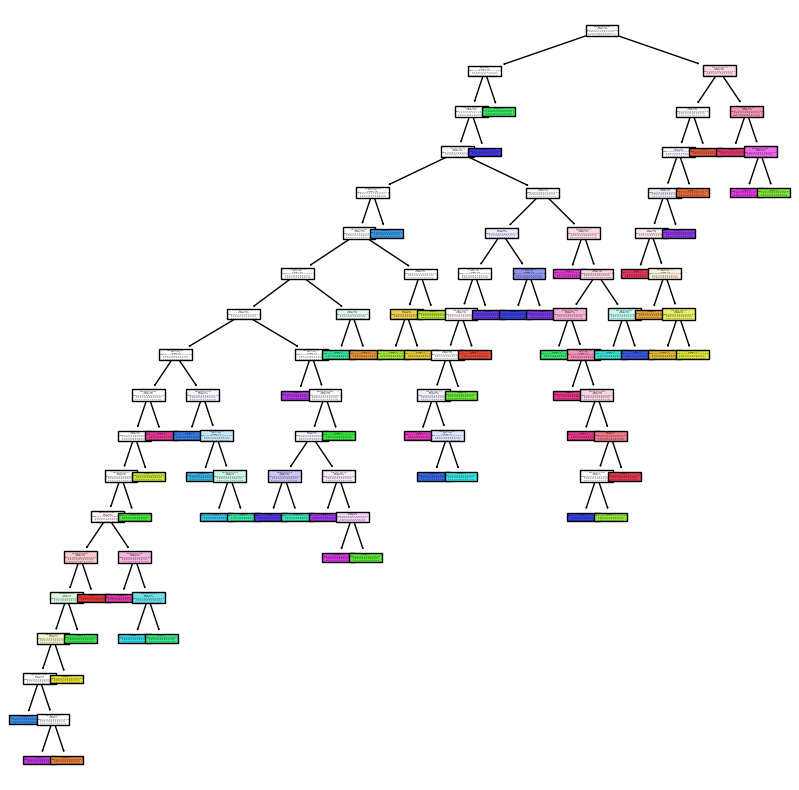

In [25]:
from sklearn import tree
plt.figure(figsize=(10,10))
tree.plot_tree(mod1,feature_names=x.columns,filled=True)
plt.show()

# Random Forest Classifier

In [26]:
from sklearn.ensemble import RandomForestClassifier
mod2=RandomForestClassifier()
mod2.fit(xtrain,ytrain)
p=mod2.predict(xtrain)
q=accuracy_score(ytrain,p)*100
q

100.0

In [27]:
p1=mod2.predict(xtest)
q1=accuracy_score(ytest,p1)*100
q1

97.5

# Support Vector Classifier

In [28]:
from sklearn.svm import SVC
mod3=SVC()
mod3.fit(xtrain,ytrain)
p=mod3.predict(xtest)
q1=accuracy_score(ytest,p)*100
q1

17.5

In [29]:
p1=mod3.predict(xtrain)
q1=accuracy_score(ytrain,p1)*100
q1

34.6875

# Prediction

In [30]:
values=[[2.753425,2.258437,1.685714]]
prediction=mod1.predict(values)
prediction

array([35])

In [31]:
if prediction==35:
    print('Artist name is Miley Cyrus')

Artist name is Miley Cyrus


In [32]:
## We can do it more clearly by using a for loop for the prediction..